## Набор данных о видеоиграх, объем продаж которых составил более 100 000 копий.

### Задачи
1. Первый шаг – загрузить данные и убедиться, что всё считалось правильно: посмотреть на столбцы, размер, наличие пропущенных значений (если есть – удалить). Также изучите типы переменных.


2. Постройте график распределения количества выпущенных игр по годам и выведите описательные характеристики переменной Year.


3. На каких платформах произошло больше всего релизов?


4. Игры каких издателей (Publisher) встречаются в датасете чаще всего?


5. В каком регионе медианное значение объема продаж игр Nintendo является наибольшим? (Регионы: NA, EU, JP, Other)


6. Изучите объемы продаж игр Nintendo в Японии с разбивкой жанрам. Посмотрите на медиану, среднее, межквартильный размах.


7. Визуализируйте динамику изменения объема мировых продаж (Global_Sales) по годам для игр Nintendo следующих жанров: Fighting, Simulation, Platform, Racing, Sports. В какие моменты времени было продано больше всего игр жанра Sports?



## Описание данных

Rank – место по объему продаж  
Name – название игры  
Platform – платформа, на которой выпущена игра  
Year – год релиза  
Genre – жанр  
Publisher – издатель  
NA_Sales – продажи в Северной Америке, в млн.  
EU_Sales – продажи в Европе, в млн.  
JP_Sales – продажи в Японии, в млн.  
Other_Sales – продажи в остальном мире, в млн.  
Global_Sales – продажи по всему миру, в млн.  

## Summary

1. Предобработала данные, переименовала колонки, удалила пропущенные значения


2. Оценила в целом объем выпущенных игр по годам 


3. Провела более детальный анализ по играм от nintentdo: меры центральной тенденции для объема продаж в регионах, объем продаж с разбивкой по жанрам и построила визуализации для этих данных


In [81]:
#импортируем библиотеки

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats

In [23]:
#считываем датафрейм, сохраняем в переменную 

df = pd.read_csv('/Users/kamilamur/data from course/games.csv')

df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [32]:
#Для удобства - названия колонок записываем со строчной буквы

df.columns = df.columns.str.lower()

df.isna().sum()

rank              0
name              0
platform          0
year            271
genre             0
publisher        58
na_sales          0
eu_sales          0
jp_sales          0
other_sales       0
global_sales      0
dtype: int64

In [33]:
#оцениваем количество пропущенных значений в датафрейме - метод isna()

df.isna().sum()


rank              0
name              0
platform          0
year            271
genre             0
publisher        58
na_sales          0
eu_sales          0
jp_sales          0
other_sales       0
global_sales      0
dtype: int64

In [21]:
#Удаляем из датафрейма пропущенные значения с помощью dropna()

df = df.dropna()

df.shape         #сверяем количество строк с датафреймом до удаления пропущенных значений(16598)


(16291, 11)

In [34]:
df

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [37]:
df.year.unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2003., 1986., 2000.,   nan, 1995., 2016., 1991., 1981., 1987.,
       1980., 1983., 2020., 2017.])

In [36]:
#Оцениваем описательные характеристики переменной year

df['year'].describe()    #50% - т.е медиана, половина игр была выпущена до 2007, половина - после
                         #медиана больше чем среднее значение

count    16327.000000
mean      2006.406443
std          5.828981
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2020.000000
Name: year, dtype: float64

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


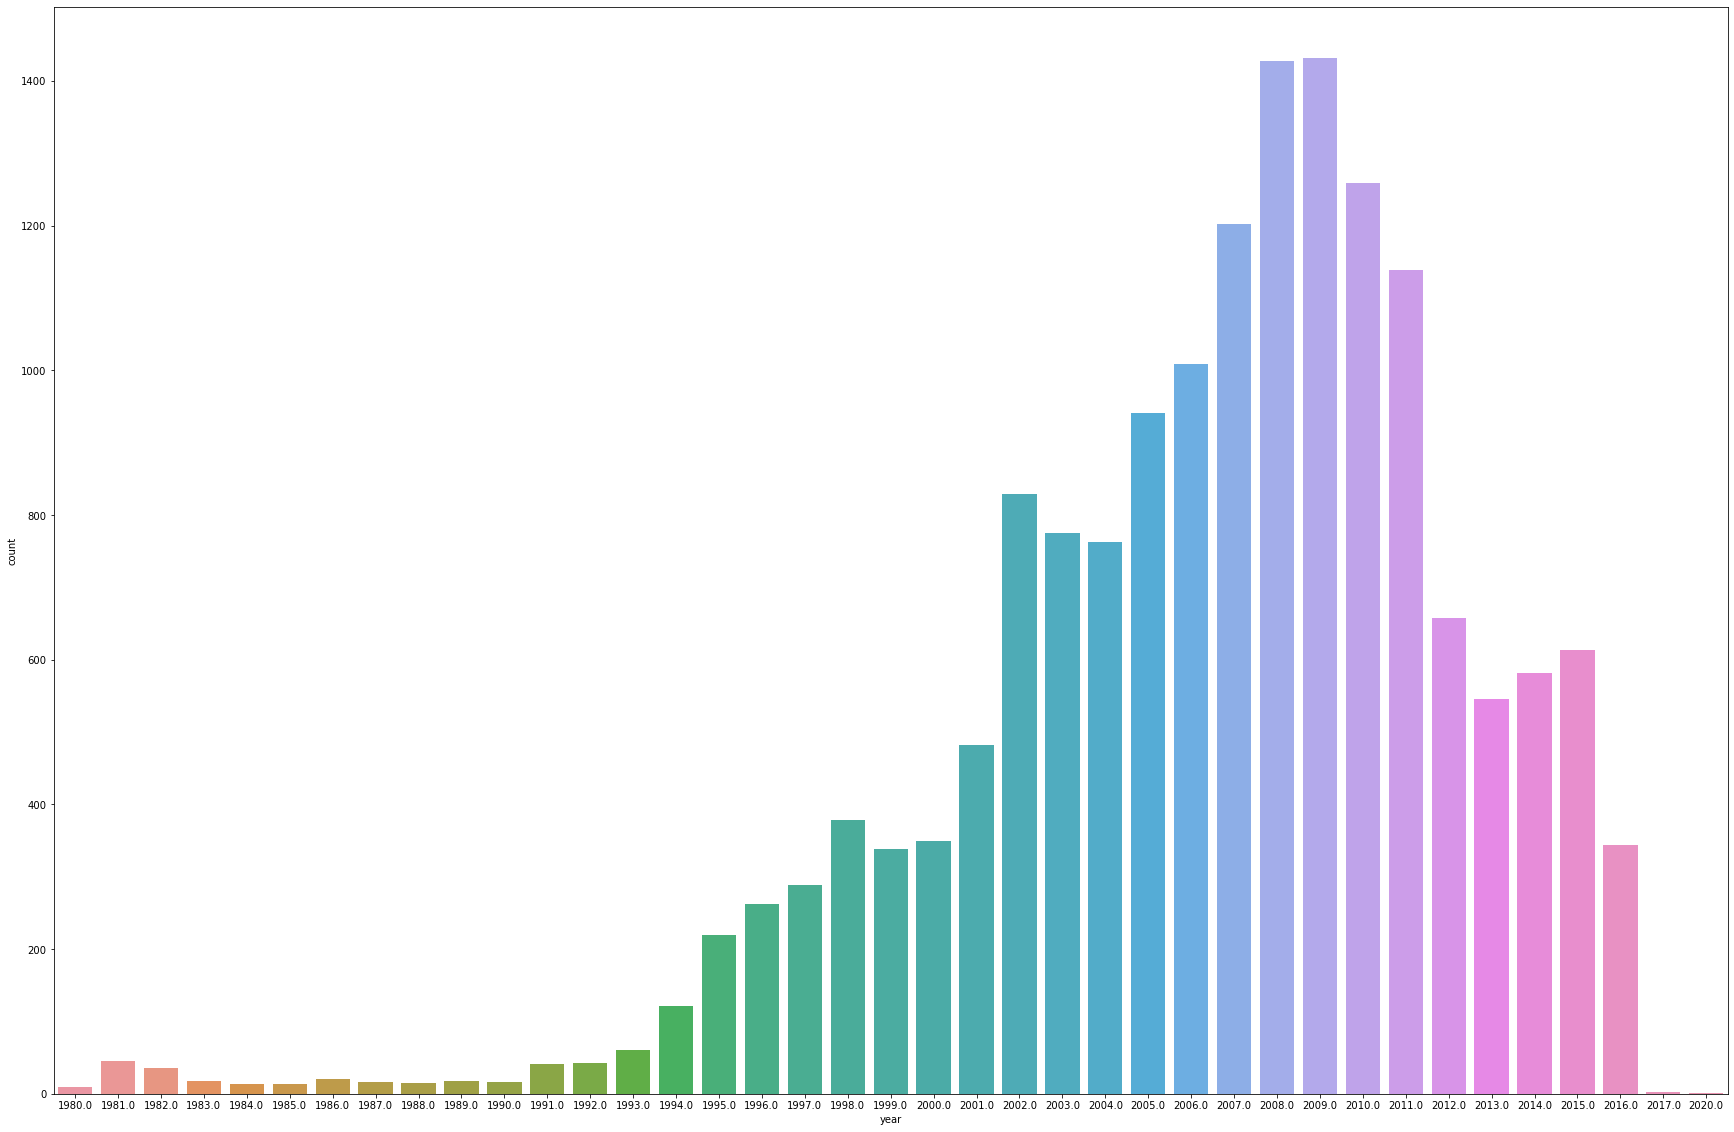

In [45]:
#график распределения количества выпущенных игр по годам.


plt.figure(figsize=(30,20))

ax = sns.countplot(df.year)

#Можно оценить, что мода - 2009 год, то есть наибольшее количество игр было выпущено в этот год

In [63]:
#Находим на каких платформах произошло больше всего релизов, оставляем только те, частота которых >7% в порядке убывания

score_popular_platform = df.platform \
    .value_counts(normalize=True) \ #normalize=True - считает частоту встречаемости
    .reset_index() \
    .rename(columns = {'index':'platform', 'platform':'score'}) \
    .query('score >= 0.07') \
    .sort_values('score',ascending=False)

score_popular_platform


,platform,score
0,DS,0.130317
1,PS2,0.130196
2,PS3,0.080070
3,Wii,0.079829
4,X360,0.076214
5,PSP,0.073081
6,PS,0.072057


In [144]:
#Оцениваем, игры каких издателей встречаются чаще всего в датасете.

df.publisher.value_counts()


Electronic Arts                 1351
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
                                ... 
Interworks Unlimited, Inc.         1
General Entertainment              1
UEP Systems                        1
Giza10                             1
Karin Entertainment                1
Name: publisher, Length: 578, dtype: int64

In [71]:
#Сфокусируемся на играх от Nintendo. 
#Посчитайте среднее, медиану и стандартное отклонение по продажам игр данного издателя в разных регионах (NA, EU, JP, Other). 
#В каком регионе медианное значение объема продаж является наибольшим?
#Hint: mean, median, std. Переменные: NA_sales и т.д. для нужных регионов.

df.head()

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [96]:
#Находим среднее и медиану по продажам игр производителя nintendo в разных регионах (NA, EU, JP, Other)

nintendo = df.query("publisher=='Nintendo'") 

(nintendo[['na_sales','eu_sales','jp_sales','other_sales','global_sales']].agg(['mean','median']))

#По результатам: медианное значение объема продаж наибольшее в NA(north america)


,na_sales,eu_sales,jp_sales,other_sales,global_sales
mean,1.161977,0.595647,0.647824,0.135605,2.541337
median,0.370000,0.120000,0.280000,0.030000,0.890000


In [101]:
#Оцениваем объем(sum) продажи nintendo в Японии по жанрам (groupby)

nintendo_gp_genre = nintendo.groupby('genre',as_index=False) \
    .agg({'jp_sales': 'sum'}) \
    .sort_values('jp_sales',ascending=False)

nintendo_gp_genre

,genre,jp_sales
4,Platform,102.36
7,Role-Playing,102.24
3,Misc,55.25
5,Puzzle,37.09
10,Sports,35.87
0,Action,29.24
6,Racing,29.22
9,Simulation,23.67
2,Fighting,14.94
11,Strategy,10.46


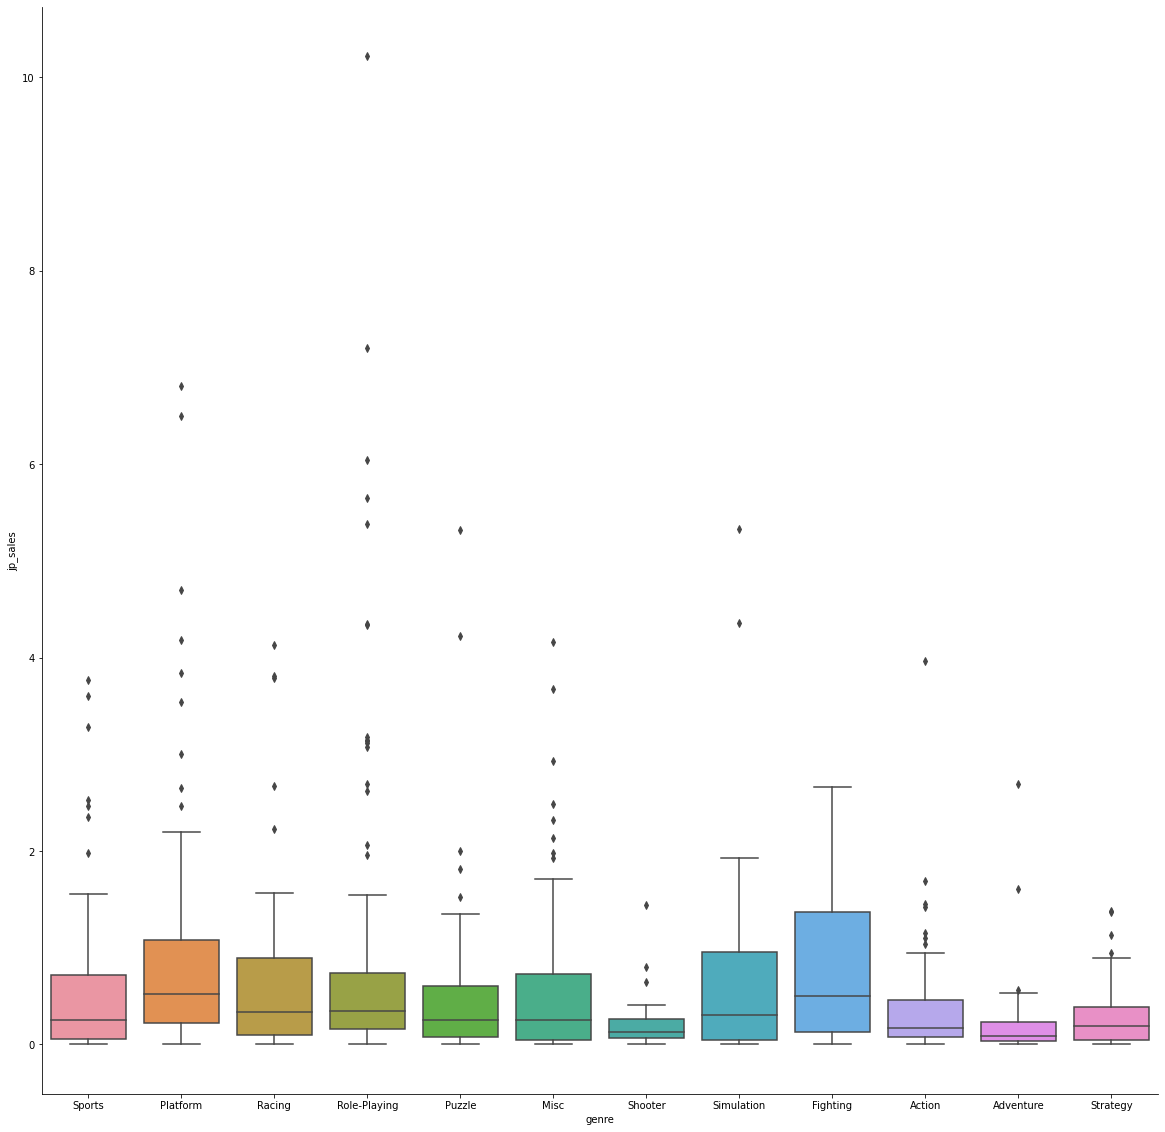

In [124]:
#Визуализируем зависимость популярности игр на nintendo в зависимости от жанра.

plt.figure(figsize=(20,20))
sns.boxplot(x = 'genre', y='jp_sales', data =nintendo.query('publisher == "Nintendo"'))
sns.despine()

#Выводы: Межквартильный размах у Strategy меньше, чем у Puzzle
#        Наибольший межквартильный размах наблюдается у игр жанра Fighting
#        Медианное значение продаж игр жанра Fighting выше, чем у игр Simulation

In [134]:
#Визуализируем динамику изменения объема мировых продаж (Global_Sales) 
#по годам для игр Nintendo следующих жанров: Fighting, Simulation, Platform, Racing, Sports.

# 1 - отбираем только nintendo и определенные жанры/ genre in('','')
# 2 - группируем по жанрам и годам(из вопроса: по годам для следующих жанров )
# 3 - находим сумму по жанрам и годам для global_sales(объем мировых продаж)


df_nintendo =  df.query("publisher=='Nintendo' and genre in('Fighting','Simulation','Platform','Racing','Sports')")\
    .groupby(['genre','year']) \
    .global_sales.sum()\
    .reset_index() 


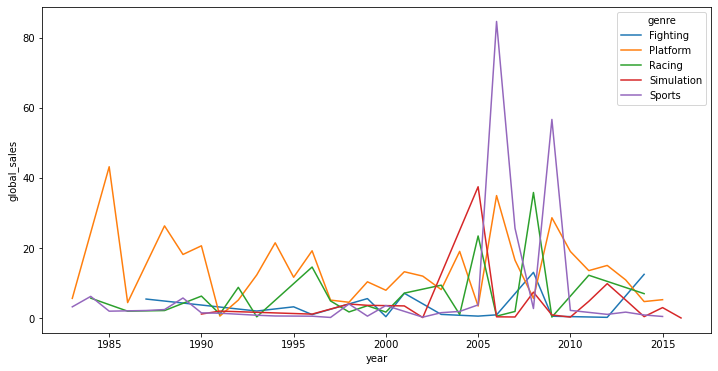

In [140]:
#Визуализируем данные в виде lineplot и сохраняем изображение

plt.figure(figsize=(12,6))

sns.lineplot(x = 'year', y = 'global_sales', hue = 'genre', data =df_nintendo )

plt.savefig('nintendo_data.jpg')


#Наблюдаем два больших пика популярности игр жанра fighting с 2005 по 2010. 
